# Introduction

## Pima Indian Diabetes Dataset

The Pima Indian Diabetes Dataset, sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, provides crucial information from a population near Phoenix, Arizona, USA. The dataset aims to facilitate the prediction of diabetes based on various health attributes.

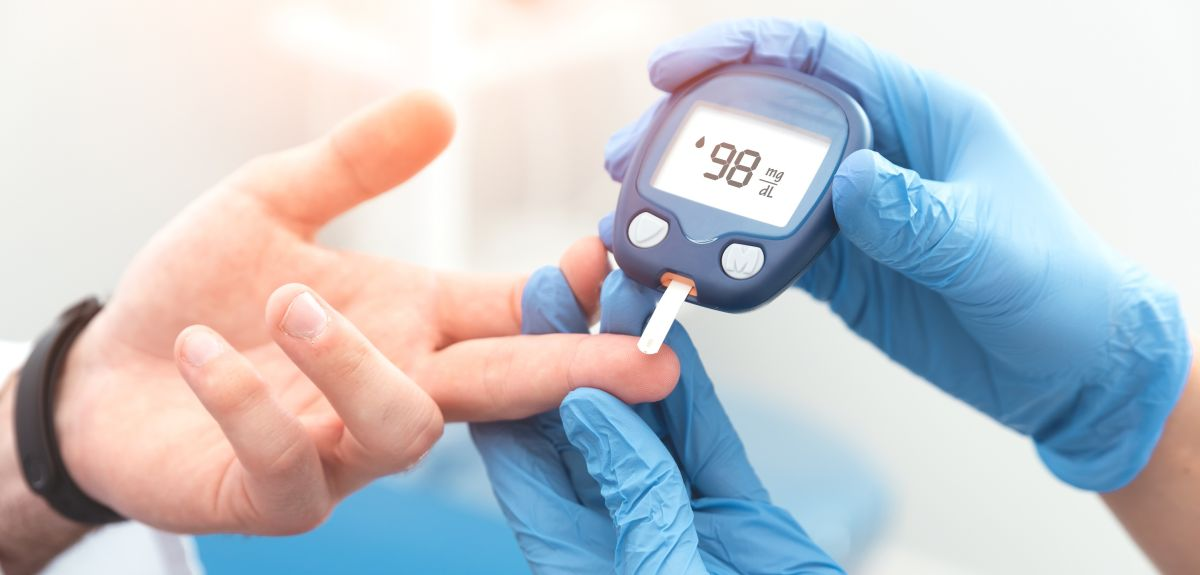
### Dataset Columns

1. **Preg (Pregnancies):** The number of times a woman has been pregnant.
2. **Plas (Plasma Glucose Concentration):** Concentration of glucose in the blood after fasting.
3. **Pres (Blood Pressure):** Blood pressure of the individual.
4. **Skin (Skin Thickness):** Measurement of skinfold thickness at the triceps.
5. **Test (Insulin Test):** Measurement of serum insulin levels.
6. **Mass (Body Mass Index - BMI):** A measure of body fat based on height and weight.
7. **Pedi (Diabetes Pedigree Function):** A function scoring the likelihood of diabetes based on family history.
8. **Age:** Age of the individual.
9. **Class (Diabetes Class Variable):** The target variable indicating whether a person has diabetes or not.

## Naive Bayes Model

In this notebook, we'll explore the use of a Naive Bayes model to predict diabetes based on the attributes provided in the dataset. Naive Bayes is a probabilistic machine learning algorithm that is particularly useful for classification tasks. It is based on Bayes' theorem and assumes independence among features, hence the term "naive."

The algorithm is well-suited for datasets with a large number of features, making it efficient and often outperforming more complex models, especially in cases where the independence assumption holds reasonably well.

Throughout this notebook, we will preprocess the data, train a Naive Bayes model, and evaluate its performance in predicting the presence or absence of diabetes in the Pima Indian population.

In [21]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
from src.viz import plot_histograms, plot_corr, plot_confusion_matrix, plot_roc_curve
from src.util import check_imbalance

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] == 200

False

## Loading and reviewing the data

In [3]:
# reading the csv file into a pandas dataframe
df = pd.read_csv("../data/pima-indians-diabetes.csv")

In [4]:
# checking the number of rows and columns in the dataframe
df.shape

(768, 9)

We have 768 rows and 9 columns

In [5]:
# checking the top 5 records, bottom 5 records and random 5 records
display(df.head(),df.tail(),df.sample(5))

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
654,1,106,70,28,135,34.2,0.142,22,0
46,1,146,56,0,0,29.7,0.564,29,0
765,5,121,72,23,112,26.2,0.245,30,0
576,6,108,44,20,130,24.0,0.813,35,0
186,8,181,68,36,495,30.1,0.615,60,1


In [6]:
# checking if there are any null values in any dataset
df.isnull().values.any()

False

In [7]:
# checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Inference:**
- There are total 9 fields
- There are 768 records
- There are no null values
- All the fields are numeric variables

In [8]:
# excluding class column
columns = list(df)[0:-1]

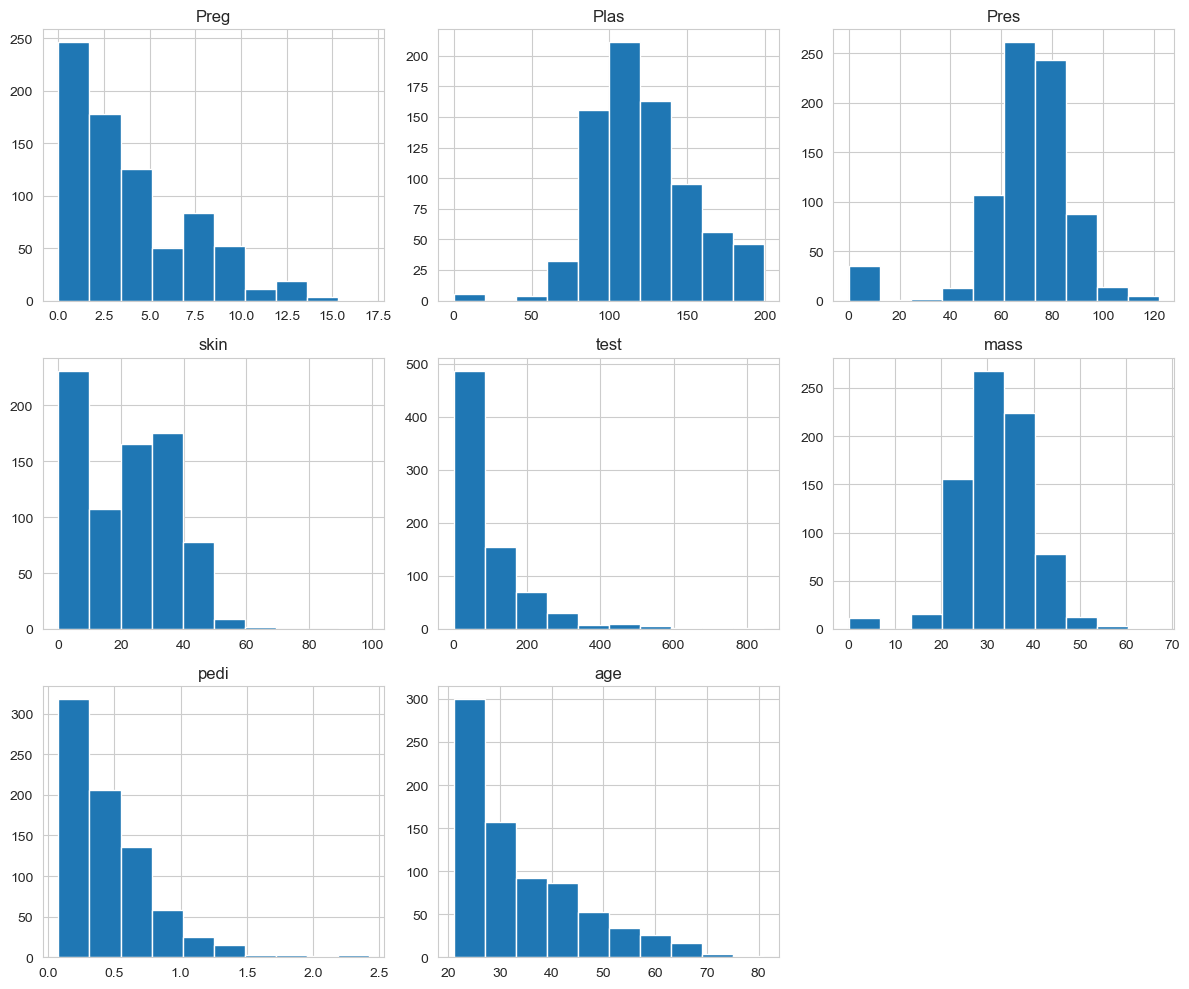

In [9]:
plot_histograms(df,column=columns)

**Inference**
- Preg: It is right skewed
- Plas: It is close to normal distribution
- Pres: It is right skewed
- skin: It is right skewed
- test: It is right skewed
- mass: It is close to normal distribution
- pedi: It is right skewed
- age: It is right skewed

## Identifying correlation in data

In [10]:
# checking the correlation matrix
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


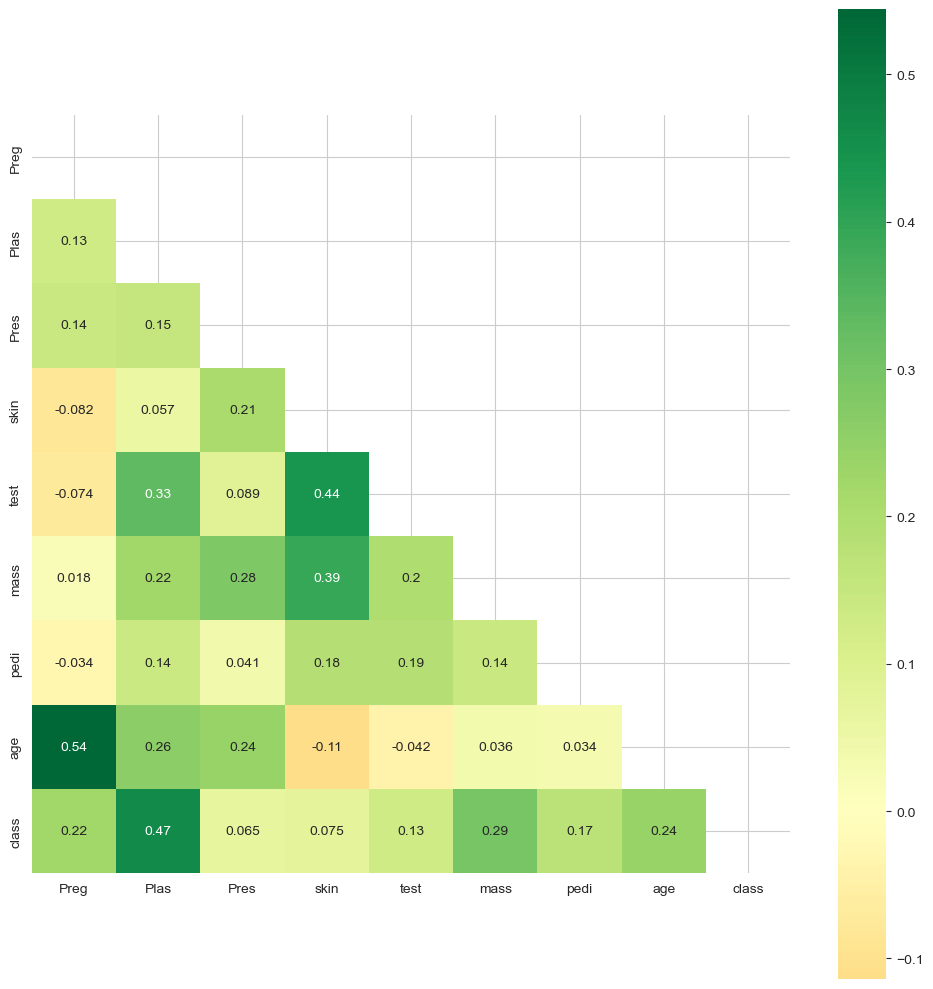

In [11]:
# making a heatmap of the correlation matrix for understanding the correlation better
corr = df.corr()
plot_corr(corr)

## Calculating diabetes ratio of True/False from outcome variable

In [12]:
check_imbalance(df, class_column='class')

Number of true: 268 (34.9%)
Number of false: 500 (65.104%)


So we have 34.90% people in the current dataset who have diabetes and rest of 65.104% doesn't have diabetes

It is a good distribution of True/False cases of diabetes in data.

## Splitting the dataset

Splitting the dataset into 70% training and 30% testing

In [13]:
# dropping the class field and storing it in X (independence variable)
X = df.drop('class',axis=1)
# storing class field in Y (dependent variable)
Y = df['class']

In [14]:
# splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=1)

## Data Preparation

### checking for miss values

There a no missing values, although we can see there a lot of entries that have 0 as their value

In [15]:
# viewing the dataset
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


We can msee there a lot of 0 entries.

__Replacing 0s with serial mean__

In [16]:
# replacing all the 0's with the column mean
imputer = SimpleImputer(missing_values=0,strategy= "mean")
cols = x_train.columns #storing the column names in the cols 
x_train = pd.DataFrame(imputer.fit_transform(x_train)) #transforming training dataset
x_test = pd.DataFrame(imputer.fit_transform(x_test)) #transforming testing dataset

# replacing the column names with actual names
x_train.columns = cols
x_test.columns = cols

# viewing the data
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


# Training Naive Bayes Algorithm

In [17]:
# creating the model
diab_model = GaussianNB()
# fitting the model to variables
diab_model.fit(x_train, y_train.ravel()) #ravel function flattens the array

GaussianNB()

In [18]:
# predicting on training data
diab_train_predict = diab_model.predict(x_train)

# checking the model accuracy on training data
acctr = metrics.accuracy_score(y_train,
                             diab_train_predict)
print(f"Model Accuracy: {acctr}")

Model Accuracy: 0.7392923649906891


In [19]:
# predicting on the testing data
diab_test_predict = diab_model.predict(x_test)

# checking the model accuracy on testing data
accte = metrics.accuracy_score(y_test,
                              diab_test_predict)
print(f"Model Accuracy: {accte}")

Model Accuracy: 0.7705627705627706


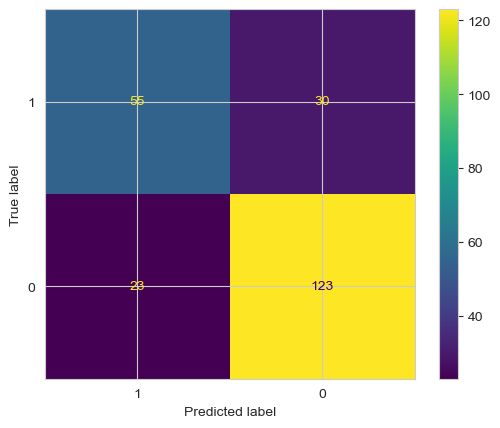

In [20]:
# plotting correlation matrix
plot_confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

In [25]:
# printing the classification report
print(metrics.classification_report(y_test,
                             diab_test_predict,
                             labels= [1,0]))

              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



We can see our true positive numbers with value 1 is of precision and recall is below 70%

# ROC Curve

In [1]:
prob = diab_model.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test,
                                         y_score=prob,
                                         pos_label=None)

roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TruePositive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'diab_model' is not defined

<strong>Author</strong> <br>
Asif Sayyed<hr>
<b> Thanks for reading my code, ⭐ Star my repository if you find it useful </b><br>
<div>
    <li><a href="https://www.linkedin.com/in/sayyedasif/">LinkedIn</a></li>
    <li><a href="https://www.credly.com/users/asif-sayyed.fef49659/badges">Credly</a></li>
    <li><a href="https://asifdotexe.github.io/">Portfolio</a></li>
<div>